In [443]:
import numpy
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# a

In [444]:
data = make_moons(n_samples=10000, noise=0.4)
data_x = data[0]
data_y = data[1]

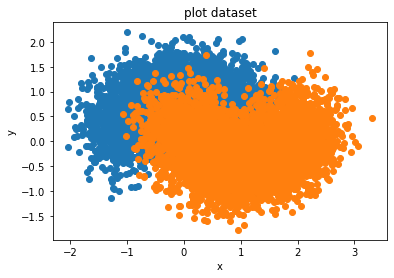

In [445]:
zeros = []
ones = []
for i in range(len(data_y)):
    if data_y[i] == 1:
        ones.append(data_x[i])
    else:
        zeros.append(data_x[i])

zeros = numpy.array(zeros)
ones = numpy.array(ones)
plt.title('plot dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(zeros[:, 0], zeros[:, 1])
plt.scatter(ones[:, 0], ones[:, 1])
plt.show()

# b

In [446]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, random_state=25)

In [447]:
X_test

array([[-0.45480832,  1.27488263],
       [ 0.93248138,  0.41153404],
       [-0.83772382,  1.42361456],
       ...,
       [ 0.193189  ,  0.48335192],
       [ 0.72016222,  0.20901283],
       [ 0.27413183, -0.13344834]])

In [448]:
y_test

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [471]:
print(f'X_test :{X_test.shape} - X_train : {X_train.shape}')

X_test :(2000, 2) - X_train : (8000, 2)


# c

In [449]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

In [450]:
param_grid = {
    'max_leaf_nodes': [8, 16, 24, 32, 64, 128, 256, 512],
    'max_depth': [4, 6, 8, 9, 10, 15],
}

In [451]:
tree_class = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_class, param_grid=param_grid, cv=5)  # cross validation
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'max_depth': [4, 6, 8, 9, 10, 15],
                         'max_leaf_nodes': [8, 16, 24, 32, 64, 128, 256, 512]})

In [452]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=16, random_state=1024)

# d

In [453]:
best_tree = DecisionTreeClassifier(random_state=1024, max_leaf_nodes=final_model.max_leaf_nodes,
                                   max_depth=final_model.max_depth)
best_tree.fit(X_train, y_train)

pred = best_tree.predict(X_test)
confusion_matrix(y_test, pred)

array([[839, 192],
       [105, 864]], dtype=int64)

In [454]:
accuracy_score(y_test, pred)

0.8515

# e

In [455]:
import random

In [456]:
data = make_moons(n_samples=100000, noise=0.4)
data_x = data[0]
data_y = data[1]

In [457]:
def make_subset(num_sample, length_sample, data_x, data_y):
    result_x = []
    result_y = []
    for i in range(num_sample):
        sample_x = []
        sample_y = []
        for j in range(length_sample):
            index = random.randint(0, len(data_x) - 1)
            sample_x.append(data_x[index])
            sample_y.append(data_y[index])
        result_x.append(sample_x)
        result_y.append(sample_y)

    return numpy.array(result_x), numpy.array(result_y)

In [458]:
x_subsets, y_subsets = make_subset(1000, 100, data_x, data_y)

In [459]:
x_subsets

array([[[ 0.74520621,  0.48780624],
        [-0.90359563,  0.33807628],
        [-0.64528193,  1.0251954 ],
        ...,
        [ 0.70340343, -0.58162065],
        [ 0.51483228,  0.99261581],
        [-0.53062605,  0.30639956]],

       [[ 1.68094166, -0.29445931],
        [ 0.90049301, -0.44666408],
        [-0.23256295,  0.48453726],
        ...,
        [ 2.69176847, -0.33675852],
        [ 1.539596  ,  0.42812222],
        [ 0.2743147 , -0.81793378]],

       [[ 0.90933764,  0.54703248],
        [ 0.20968437,  1.16071046],
        [ 1.35517358,  0.09455142],
        ...,
        [ 0.19846457, -0.02589594],
        [ 2.28498932, -0.97458591],
        [-0.17107867, -0.2897892 ]],

       ...,

       [[ 1.78504042, -0.33232576],
        [ 1.44022912,  0.20529946],
        [-0.96000541,  1.03752333],
        ...,
        [-1.33222758, -0.44140411],
        [ 0.81797847,  0.54328886],
        [-0.2934411 ,  0.92818962]],

       [[ 1.2865561 ,  0.21584513],
        [-0.02481374,  0.73

# f

In [460]:
from sklearn.base import clone

In [461]:
param_grid = {
    'max_leaf_nodes': [2, 4, 8, 16],
    'max_depth': [2, 3, 4, 5, 6, 8, 9, 10],
}

tree_class = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_class, param_grid=param_grid, cv=5)  # cross validation
grid_search.fit(x_subsets[0], y_subsets[0])
# grid_search.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 9, 10],
                         'max_leaf_nodes': [2, 4, 8, 16]})

In [462]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=1024)

In [463]:
my_best_subsample_model = DecisionTreeClassifier(random_state=1024, max_leaf_nodes=final_model.max_leaf_nodes,
                                                 max_depth=final_model.max_depth)
# my_best_subsample_model.fit(x_subsets[0], y_subsets[0])

In [464]:
model_pool = []

for i in range(len(x_subsets)):
    new_model = clone(my_best_subsample_model)
    model_pool.append(new_model)
    new_model.fit(x_subsets[i], y_subsets[i])


In [465]:
for i in range(len(model_pool)):
    prediction = model_pool[i].predict(X_test)
    acc = accuracy_score(y_test, prediction)
    print(f'accuracy_score is {acc}')

accuracy_score is 0.813
accuracy_score is 0.8075
accuracy_score is 0.8525
accuracy_score is 0.8125
accuracy_score is 0.8455
accuracy_score is 0.8285
accuracy_score is 0.8485
accuracy_score is 0.853
accuracy_score is 0.785
accuracy_score is 0.85
accuracy_score is 0.8295
accuracy_score is 0.831
accuracy_score is 0.815
accuracy_score is 0.825
accuracy_score is 0.845
accuracy_score is 0.8325
accuracy_score is 0.8575
accuracy_score is 0.7875
accuracy_score is 0.8475
accuracy_score is 0.846
accuracy_score is 0.8125
accuracy_score is 0.83
accuracy_score is 0.8465
accuracy_score is 0.85
accuracy_score is 0.699
accuracy_score is 0.845
accuracy_score is 0.844
accuracy_score is 0.8445
accuracy_score is 0.801
accuracy_score is 0.8345
accuracy_score is 0.8035
accuracy_score is 0.813
accuracy_score is 0.8415
accuracy_score is 0.839
accuracy_score is 0.8195
accuracy_score is 0.8385
accuracy_score is 0.8455
accuracy_score is 0.841
accuracy_score is 0.8415
accuracy_score is 0.8475
accuracy_score is 0.8

# g

In [466]:
from sklearn.ensemble import VotingClassifier
from scipy.stats import mode

In [467]:
def smothing_result(x):
    if x >= 0.5:
        return 1
    else:
        return 0

In [468]:
def predict_multi_tree(models_list, X_input):
    results = []
    for i in range(len(models_list)):
        prediction = models_list[i].predict(X_input)
        results.append(prediction)

    return results

In [469]:
tree_prediction = predict_multi_tree(model_pool, X_test)
tree_prediction = mode(tree_prediction)[0][0]

accuracy_score(y_test, tree_prediction)

0.858

# h => part d result is 0.851 a little improvement